In [49]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from eval_method import eval_method


from sklearn import metrics

# Travail B

## La méthode DBSCAN et la BD Vote

### Exercice XIII

In [50]:
file = "datasets/vote.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


In [51]:
encoder = {"y": 1, "n": -1, "?": 0, "democrat": 1, "republican": 0}
data = data.replace(encoder)
data
attributes_to_keep = ["handicapped-infants",  "physician-fee-freeze", "education-spending", "water-project-cost-sharing", "religious-groups-in-schools", "immigration","duty-free-exports", "crime", "Class"]

data = data[attributes_to_keep]
data


C:\Users\paull\AppData\Local\Temp\ipykernel_17584\1650190202.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(encoder)


,handicapped-infants,physician-fee-freeze,education-spending,water-project-cost-sharing,religious-groups-in-schools,immigration,duty-free-exports,crime,Class
0,-1,1,1,1,1,1,-1,1,0
1,-1,1,1,1,1,-1,-1,1,0
2,0,0,-1,1,1,-1,-1,1,1
3,-1,-1,-1,1,1,-1,-1,-1,1
4,1,-1,0,1,1,-1,1,1,1
...,...,...,...,...,...,...,...,...,...
430,-1,1,1,-1,1,1,-1,1,0
431,-1,-1,-1,-1,-1,1,-1,-1,1
432,-1,1,1,0,1,-1,-1,1,0
433,-1,1,1,-1,1,0,-1,1,0


In [52]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
db = DBSCAN(eps=1.4, min_samples=20)

clustering = db.fit(X)
clustering.labels_

array([ 0,  0, -1, -1, -1, -1, -1, -1,  0,  1, -1,  0, -1, -1,  0,  0, -1,
        1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  1, -1,  0,
        1,  0, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  0,  1,
        0,  1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  1,  1, -1, -1,  0,  0,
        1,  1,  1, -1,  1, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0,
       -1,  0,  0, -1,  0,  1,  1, -1,  1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1,  1,  0, -1,  1,  1, -1,  0, -1,  0,  1, -1,  1, -1, -1,
        0,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1,  1, -1,  0,  0,  0,  0,
        0, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
        1,  0, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
        1, -1,  1,  0,  0, -1, -1, -1,  0, -1, -1, -1,  1, -1,  1, -1,  1,
        0, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1, -1, -1,
       -1,  1, -1,  0,  0

In [54]:
minPoints_array = [2,3,4,6,10,15,20,25,30]
epsilon = 1.1
df_results = pd.DataFrame(columns=["algorithm", "min_points", "n_clusters", "n_noise", "error_rate", "mislabelled_democrat", "mislabelled_republican"])


print(f"Number of republican: {sum(y == 0)}\n\t  democrat: {sum(y == 1)}")

for min_point in minPoints_array:
    # print(f"\n\n ----- min_point = {min_point} -----")
    db = DBSCAN(eps=epsilon, min_samples=min_point)
    db.fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    error_rate = sum(labels == y) / len(y)
    mislabelled_democrat = sum(labels[y == 1] != 1)
    mislabelled_republican = sum(labels[y == 0] != 0)

    new_row = {
        "algorithm": "DBSCAN",
        "min_points": min_point,
        "n_clusters": n_clusters_,
        "n_noise": n_noise_,
        "error_rate": error_rate,
        "mislabelled_democrat": mislabelled_democrat,
        "mislabelled_republican": mislabelled_republican,
    }

    df_results = pd.concat([df_results, pd.DataFrame([new_row])])
    
df_results

Number of republican: 168
	  democrat: 267


C:\Users\paull\AppData\Local\Temp\ipykernel_17584\3459118035.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])])


,algorithm,min_points,n_clusters,n_noise,error_rate,mislabelled_democrat,mislabelled_republican
0,DBSCAN,2,39,47,0.310345,263,37
0,DBSCAN,3,23,79,0.310345,263,37
0,DBSCAN,4,17,105,0.305747,263,39
0,DBSCAN,6,10,146,0.462069,185,49
0,DBSCAN,10,3,219,0.457471,185,51
0,DBSCAN,15,2,230,0.455172,186,51
0,DBSCAN,20,2,233,0.448276,189,51
0,DBSCAN,25,2,240,0.432184,196,51
0,DBSCAN,30,4,261,0.183908,264,91


### Exercice XIV

In [55]:
epsilon_array = list(np.arange(1, 3, 0.1))
# epsilon_array = list(np.arange(0.1, 3, 0.1))
df_results = pd.DataFrame(columns=["algorithm", "epsilon", "n_clusters", "n_noise", "error_rate", "mislabelled_democrat", "mislabelled_republican"])


for epsilon in epsilon_array:
    db = DBSCAN(eps=epsilon, min_samples=20)
    db.fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    error_rate = sum(labels == y) / len(y)
    mislabelled_democrat = sum(labels[y == 1] != 1)
    mislabelled_republican = sum(labels[y == 0] != 0)

    # if round(epsilon,2) == 1.4:
    #     print(labels)

    new_row = {
        "algorithm": "DBSCAN",
        "epsilon": epsilon,
        "n_clusters": n_clusters_,
        "n_noise": n_noise_,
        "error_rate": error_rate,
        "mislabelled_democrat": mislabelled_democrat,
        "mislabelled_republican": mislabelled_republican,
    }

    df_results = pd.concat([df_results, pd.DataFrame([new_row])])
    
df_results

C:\Users\paull\AppData\Local\Temp\ipykernel_17584\3364025410.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])])


,algorithm,epsilon,n_clusters,n_noise,error_rate,mislabelled_democrat,mislabelled_republican
0,DBSCAN,1.0,2,233,0.448276,189,51
0,DBSCAN,1.1,2,233,0.448276,189,51
0,DBSCAN,1.2,2,233,0.448276,189,51
0,DBSCAN,1.3,2,233,0.448276,189,51
0,DBSCAN,1.4,2,233,0.448276,189,51
0,DBSCAN,1.5,3,199,0.473563,185,44
0,DBSCAN,1.6,3,199,0.473563,185,44
0,DBSCAN,1.7,3,199,0.473563,185,44
0,DBSCAN,1.8,3,158,0.567816,145,43
0,DBSCAN,1.9,3,158,0.567816,145,43


### Exercice XV

Lors du test de MakeDensityBasedClusterer avec DBScan, on a à chaque fois une erreur : "COMPLERTER ++++++". On va donc se concentrer sur les deux autres méthodes.

| Algorithme    | Paramètre  | Meilleure LV | Nb Clusters | Taux erreur |
|---------------|------------|--------------|-------------|-------------|
| SimpleKMeans  | seed = 100 | -7,70808     | 2           | 12,64%      |
| FarthestFirst | seed = 50  | -7,70236     | 2           | 11,95%      |


## Méthode probabiliste EM et la BD Weather

### Execice XVI

GaussianMixture permet de faire la méthode EM avec sklearn (https://scikit-learn.org/1.5/modules/mixture.html)

In [56]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

In [57]:
file = "datasets/weather_numeric.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,outlook,temperature,humidity,windy,play
0,sunny,85.0,85.0,FALSE,no
1,sunny,80.0,90.0,TRUE,no
2,overcast,83.0,86.0,FALSE,yes
3,rainy,70.0,96.0,FALSE,yes
4,rainy,68.0,80.0,FALSE,yes
5,rainy,65.0,70.0,TRUE,no
6,overcast,64.0,65.0,TRUE,yes
7,sunny,72.0,95.0,FALSE,no
8,sunny,69.0,70.0,FALSE,yes
9,rainy,75.0,80.0,FALSE,yes


In [58]:
encoder = {
    "outlook": {"sunny": 0, "overcast": 0.5, "rainy": 1},
    "windy": {"FALSE": 0, "TRUE": 1},
    "play": {"no": 0, "yes": 1},
}

# Normalize temperature and humidity, so all the attributes will have the same weights in the clustering algorithm

# Saving maximum and minimum for later reverse normalization
max_temperature = data["temperature"].max()
min_temperature = data["temperature"].min()
max_humidity = data["humidity"].max()
min_humidity = data["humidity"].min()

scaler = preprocessing.MinMaxScaler()
data[['temperature', 'humidity']] = scaler.fit_transform(data[['temperature', 'humidity']])

data = data.replace(encoder)
data

C:\Users\paull\AppData\Local\Temp\ipykernel_17584\1867022829.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(encoder)


,outlook,temperature,humidity,windy,play
0,0.0,1.000000,0.645161,0,0
1,0.0,0.761905,0.806452,1,0
2,0.5,0.904762,0.677419,0,1
3,1.0,0.285714,1.000000,0,1
4,1.0,0.190476,0.483871,0,1
5,1.0,0.047619,0.161290,1,0
6,0.5,0.000000,0.000000,1,1
7,0.0,0.380952,0.967742,0,0
8,0.0,0.238095,0.161290,0,1
9,1.0,0.523810,0.483871,0,1


In [59]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
EM = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = EM.predict(X)
labels

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [60]:
df_results = pd.DataFrame(columns=["algorithm", "seed", "Error rate", "False positive", "False negative", "Confusion matrix"])

for seed in range(10):
    EM = GaussianMixture(n_components=2, random_state=seed).fit(X)
    labels = EM.predict(X)

    # Find the label of the positive class
    number_1 = sum(labels == 1)
    number_0 = sum(labels == 0)
    positive_class = 1 if number_1 > number_0 else 0
    if positive_class == 0:
        labels = 1 - labels
    
    conf_matrix = confusion_matrix(y, labels)
    false_positive = conf_matrix[0][1]
    false_negative = conf_matrix[1][0]
    error_rate = (false_positive + false_negative) / len(y)
    

    new_row = {
        "algorithm": "EM",
        "seed": seed,
        "Error rate": error_rate,
        "False positive": false_positive,
        "False negative": false_negative,
        "Confusion matrix": conf_matrix
    }

    df_results = pd.concat([df_results, pd.DataFrame([new_row])])

df_results

C:\Users\paull\AppData\Local\Temp\ipykernel_17584\926497024.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])])


,algorithm,seed,Error rate,False positive,False negative,Confusion matrix
0,EM,0,0.357143,2,3,"[[3, 2], [3, 6]]"
0,EM,1,0.357143,2,3,"[[3, 2], [3, 6]]"
0,EM,2,0.357143,2,3,"[[3, 2], [3, 6]]"
0,EM,3,0.357143,2,3,"[[3, 2], [3, 6]]"
0,EM,4,0.357143,2,3,"[[3, 2], [3, 6]]"
0,EM,5,0.357143,2,3,"[[3, 2], [3, 6]]"
0,EM,6,0.357143,2,3,"[[3, 2], [3, 6]]"
0,EM,7,0.571429,3,5,"[[2, 3], [5, 4]]"
0,EM,8,0.357143,2,3,"[[3, 2], [3, 6]]"
0,EM,9,0.357143,2,3,"[[3, 2], [3, 6]]"


### Exercice XVII

In [61]:
EM = GaussianMixture(n_components=2, random_state=0).fit(data)
df_results = pd.DataFrame(columns=["Cluster 0", "Cluster 1"])

for i, attribute in zip(range(5), data.columns):
    if attribute == "temperature":
        diff = max_temperature - min_temperature
        df_results.loc[attribute] = [EM.means_[0][i] * diff + min_temperature, EM.means_[1][i] * diff + min_temperature]
    elif attribute == "humidity":
        diff = max_humidity - min_humidity
        df_results.loc[attribute] = [EM.means_[0][i] * diff + min_humidity, EM.means_[1][i] * diff + min_humidity]
    else:
        df_results.loc[attribute] = [EM.means_[0][i], EM.means_[1][i]]

df_results

,Cluster 0,Cluster 1
outlook,0.25,0.6
temperature,77.00,72.2
humidity,90.25,78.2
windy,0.50,0.4
play,0.00,0.9


GaussianMixture ne gère que des valeurs numériques. Pour les attributs catégoriels binaire, on peux prendre l'attribut dont la valeur encodée est la plus proche de la moyenne. Cependant, poour outlook, les valeurs proches de 0.5 peuvent signifier par exemple soit beaucoup de overcast, soit un nombre proche de sunny et rainy. Cependant, la valeur de 0.25 dans le cluster 0 signifie qu'il y a une prépondérance de "rainy".

Le tableau modifié donne alors : 

| Cluster  | Outlook | Temperature | Humidity | Windy | Play |
|----------|---------|-------------|----------|-------|------|
| Cluster0 | rainy   | 77          | 90.25    | /     | no   |
| Cluster1 | /       | 72.2        | 78.2     | FALSE | yes  |

## Application de CobWeb et la BD. Weather

### Exercice XVIII

Appliquer COBWEB à la BD

situé entre 0.280697275 et 0.280697280

Résultats pour Cutoff de 0.280697275

![](image/B_ex18_CM.png)

### Exercice XIX

![](image/B_ex18_tree.png)

### Exercice XXI

Hierarchical clusturing

In [65]:
file = "datasets/weather_nominal.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
2,overcast,hot,high,FALSE,yes
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
6,overcast,cool,normal,TRUE,yes
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
9,rainy,mild,normal,FALSE,yes


In [66]:
encoder = {"rainy": 0, "overcast": 1, "sunny": 2,
           "cool": 0, "mild": 1, "hot": 2,
           "normal": 0, "high": 1,
           "FALSE": 0, "TRUE": 1,
           "no": 0, "yes": 1}
data = data.replace(encoder)
data

C:\Users\paull\AppData\Local\Temp\ipykernel_17584\856984954.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(encoder)


,outlook,temperature,humidity,windy,play
0,2,2,1,0,0
1,2,2,1,1,0
2,1,2,1,0,1
3,0,1,1,0,1
4,0,0,0,0,1
5,0,0,0,1,0
6,1,0,0,1,1
7,2,1,1,0,0
8,2,0,0,0,1
9,0,1,0,0,1


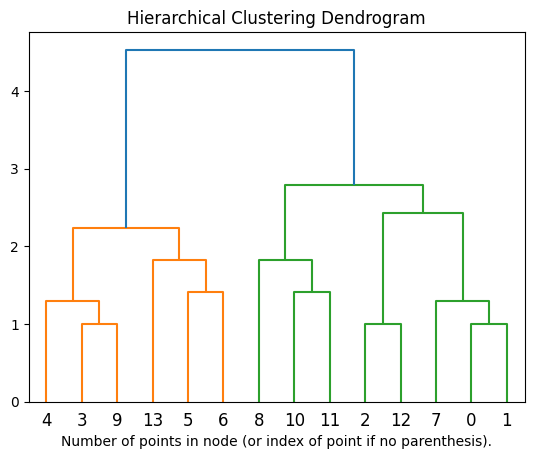

In [67]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=1, compute_distances=True)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()